**Import wymaganych bibliotek**

In [3]:
import matplotlib.pyplot as pl
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

**Importowanie danych z pliku - plik CSV.**

In [5]:
dane = pd.read_csv('../Data/waga_wzrost.csv', sep=';', decimal=',')
#dane.head(5)
dane.tail(10)

,height,weight,shoe_size,hair,gender,color
33,163,55,37,1,K,Red
34,157,53,36,1,K,Red
35,189,71,39,1,K,Red
36,197,97,41,0,K,Red
37,191,79,45,0,M,Blue
38,165,66,35,1,K,Red
39,168,64,36,1,K,Red
40,202,101,42,0,M,Blue
41,187,88,42,1,M,Blue
42,172,96,42,0,M,Blue


Text(0, 0.5, 'shoe_size')

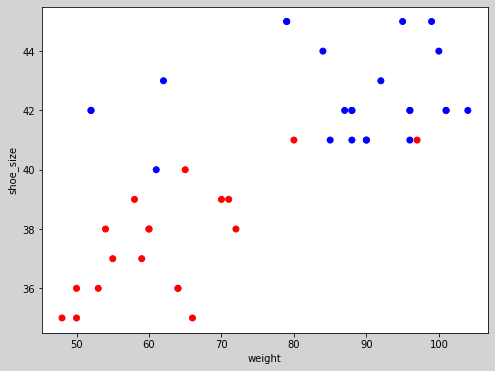

In [6]:
pl.figure(figsize=(8, 6), facecolor='lightgrey')

xx = 1
yy = 2

pl.scatter(dane.iloc[:,xx], dane.iloc[:,yy], color=dane.iloc[:,5])

pl.xlabel(dane.columns[xx])
pl.ylabel(dane.columns[yy])

In [7]:
X = np.array(dane.iloc[0:29,0:4])
Y = np.array(dane.iloc[0:29,4])
#print(X)
#print(Y)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,Y)

KNeighborsClassifier()

**Testowanie**

In [21]:
nr_testowy = 34
testowy = dane.iloc[nr_testowy,0:4]
print(dane.iloc[nr_testowy,:])

testowy2 = pd.Series([187,53,46,0])
print(testowy2)

wynik = knn.predict(np.array([testowy2]))
print("Dopasowane jako ",wynik[0])

height       157
weight        53
shoe_size     36
hair           1
gender         K
color        Red
Name: 34, dtype: object
Dopasowane jako  M


**Sprawdzanie działania modelu**

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = np.array(dane.iloc[:,0:4])
Y = np.array(dane.iloc[:,4])

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.2)

print(len(Xtrain))
print(len(Ytrain))
print(len(Xtest))
print(len(Ytest))

34
34
9
9


In [10]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(Xtrain,Ytrain)

print(accuracy_score(knn.predict(Xtrain),Ytrain))
print(accuracy_score(knn.predict(Xtest),Ytest))

0.8823529411764706
1.0
